# Project 2 - Cleaner Data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline

In [2]:
ames_df = pd.read_csv('./datasets/train.csv')

In [3]:
ames_df_test = pd.read_csv('./datasets/test.csv')

In [4]:
pd.set_option('display.max_columns', None)
ames_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [5]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
ames_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

### Data Cleaning

Numeric columns, nan to 0: lot frontage, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, Bsmt Half Bath, Garage Cars, Garage Area  
Numeric columns, nan to impute (knn or mean): Garage Yr Blt (impute 1895, oldest garage blt year),

Categorical columns, nan to None: Mas Vnr Area   
Categorical columns, nan to NA: Alley, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type1, BsmtFin Type2, Fireplace Q, Garage Type, Garage Finish, Garage Qual, Garage Cond, Pool QC, Fence, Misc Feature

Columns to consider dropping (not enough info): Alley, Pool QC, Fence, Misc Feature

In [7]:
ames_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [8]:
ames_df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,878.0,1.444749e+03,8.508383e+02,2.0,6.922500e+02,1433.0,2.197500e+03,2.928000e+03
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03


In [9]:
# replace garage yr blt blanks with 1895, oldest year (effectively saying of garage is old is is of less value, these are of the least value)
ames_df['Garage Yr Blt'] = ames_df['Garage Yr Blt'].replace(np.nan, 1895)

In [10]:
# replace all other blank numerical cells with 0
ames_df_num = ames_df.select_dtypes(exclude='object').replace(np.nan, 0)

In [11]:
# replace one categorical column that uses None instead of NA
ames_df['Mas Vnr Type'] = ames_df['Mas Vnr Type'].replace(np.nan, 'None')

In [12]:
# replace all categorical blanks with NA
ames_df_cat = ames_df.select_dtypes(include='object').replace(np.nan, 'NA')

In [13]:
ames_df_nona = pd.concat([ames_df_cat, ames_df_num],axis=1)

In [14]:
ames_df_nona.head(2)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000


In [15]:
# test data: replace garage yr blt blanks with 1895, oldest year
ames_df_test['Garage Yr Blt'] = ames_df_test['Garage Yr Blt'].replace(np.nan, 1895)

In [16]:
# test data: replace all other blank numerical cells with 0
ames_df_test_num = ames_df_test.select_dtypes(exclude='object').replace(np.nan, 0)

In [17]:
# test data: replace one categorical column that uses None instead of NA
ames_df_test['Mas Vnr Type'] = ames_df_test['Mas Vnr Type'].replace(np.nan, 'None')

In [18]:
# replace all categorical blanks with NA
ames_df_test_cat = ames_df_test.select_dtypes(include='object').replace(np.nan, 'NA')

In [19]:
ames_df_test_nona = pd.concat([ames_df_test_cat, ames_df_test_num],axis=1)

In [20]:
ames_df_test_nona.head(2)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,Fa,Typ,NA,Detchd,Unf,Po,Po,Y,NA,NA,NA,WD,2658,902301120,190,69.0,9142,6,8,1910,1950,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1910.0,1,440,0,60,112,0,0,0,0,4,2006
1,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,2718,905108090,90,0.0,9662,5,4,1977,1977,0.0,0,0,1967,1967,1967,0,0,1967,0,0,2,0,6,2,10,0,1977.0,2,580,170,0,0,0,0,0,0,8,2006


#### Dealing with outliers

In [21]:
ames_df_nona['Garage Yr Blt'].sort_values()

722     1895.0
136     1895.0
1374    1895.0
139     1895.0
1074    1895.0
         ...  
1700    2009.0
1732    2009.0
144     2010.0
1241    2010.0
1699    2207.0
Name: Garage Yr Blt, Length: 2051, dtype: float64

In [22]:
ames_df_nona[ames_df_nona['Garage Yr Blt'] == 2207]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
1699,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,NA,NA,New,2261,916384070,20,68.0,8298,8,5,2006,2007,0.0,583.0,0.0,963.0,1546.0,1564,0,0,1564,0.0,0.0,2,0,2,1,6,1,2207.0,2.0,502.0,132,0,0,0,0,0,0,9,2007,267300


In [23]:
ames_df_nona.loc[1699, 'Garage Yr Blt'] = 2007

In [24]:
ames_df_nona.loc[1699, 'Garage Yr Blt']

2007.0

In [25]:
ames_df_nona['Lot Area'].sort_values()

1510      1300
1544      1470
53        1476
787       1477
1447      1484
         ...  
745      57200
960      63887
1854     70761
694     115149
471     159000
Name: Lot Area, Length: 2051, dtype: int64

In [26]:
ames_df_nona = ames_df_nona[ames_df_nona['Lot Area'] < 30_000]

In [27]:
ames_df_nona['Gr Liv Area'].sort_values()

1428     334
432      438
1518     480
1643     492
1292     498
        ... 
858     3395
1939    3493
1692    3500
1035    3608
1897    3672
Name: Gr Liv Area, Length: 2026, dtype: int64

In [28]:
# Removing the 2 outliers above 4000 sq ft of living area
ames_df_nona = ames_df_nona[ames_df_nona['Gr Liv Area'] < 4000]

In [29]:
ames_df_nona

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,0,1,2008,298751
2047,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,785,905377130,30,0.0,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,0,3,2009,82500
2048,RL,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,NA,NA,NA,WD,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,0,3,2009,177000
2049,RL,Pave,NA,R

### Basic Feature Engineering

In [30]:
ames_df_nona['Age'] = 2011 - ames_df_nona['Year Built']

In [31]:
ames_df_nona['yrs_since_remodel'] = 2011 - ames_df_nona['Year Remod/Add']

In [32]:
ames_df_nona['garage_age'] = 2011 - ames_df_nona['Garage Yr Blt']

In [33]:
# Repeating for test data:
ames_df_test_nona['Age'] = 2011 - ames_df_test_nona['Year Built']
ames_df_test_nona['yrs_since_remodel'] = 2011 - ames_df_test_nona['Year Remod/Add']
ames_df_test_nona['garage_age'] = 2011 - ames_df_test_nona['Garage Yr Blt']

### Polynomial Feature Engineering

In [34]:
ames_df_nona['OverallQual_GrLivArea'] = ames_df_nona['Overall Qual'] * ames_df_nona['Gr Liv Area']

In [35]:
ames_df_nona['GarageArea_Cars'] = ames_df_nona['Garage Area'] * ames_df_nona['Garage Cars']

In [36]:
ames_df_nona['Age_RemodAge'] = ames_df_nona['Age'] * ames_df_nona['yrs_since_remodel']

In [37]:
ames_df_nona['Bsmt_1stFlrSF'] = ames_df_nona['Total Bsmt SF'] * ames_df_nona['1st Flr SF']

In [38]:
ames_df_nona['FullBath_RmsAbvGrd'] = ames_df_nona['Full Bath'] * ames_df_nona['TotRms AbvGrd']

In [39]:
ames_df_nona['YrSoldMult'] = ames_df_nona['Overall Qual'] * ames_df_nona['Yr Sold']

In [40]:
ames_df_nona.head(2)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500,35,6,35.0,8874,950.0,210,525625.0,12,12060
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000,15,14,14.0,14854,1118.0,210,833569.0,16,14063


In [41]:
ames_df_nona.shape

(2026, 90)

In [42]:
#Repeating for test data:
ames_df_test_nona['OverallQual_GrLivArea'] = ames_df_test_nona['Overall Qual'] * ames_df_test_nona['Gr Liv Area']
ames_df_test_nona['GarageArea_Cars'] = ames_df_test_nona['Garage Area'] * ames_df_test_nona['Garage Cars']
ames_df_test_nona['Age_RemodAge'] = ames_df_test_nona['Age'] * ames_df_test_nona['yrs_since_remodel']
ames_df_test_nona['Bsmt_1stFlrSF'] = ames_df_test_nona['Total Bsmt SF'] * ames_df_test_nona['1st Flr SF']
ames_df_test_nona['FullBath_RmsAbvGrd'] = ames_df_test_nona['Full Bath'] * ames_df_test_nona['TotRms AbvGrd']
ames_df_test_nona['YrSoldMult'] = ames_df_test_nona['Overall Qual'] * ames_df_test_nona['Yr Sold']

In [43]:
ames_df_test_nona.shape

(878, 89)

In [44]:
ames_df_nona['Yr Sold'].value_counts()

2007    489
2009    445
2006    431
2008    430
2010    231
Name: Yr Sold, dtype: int64

In [45]:
ames_df_test_nona['Yr Sold'].value_counts()

2009    202
2007    195
2008    187
2006    187
2010    107
Name: Yr Sold, dtype: int64

## EDA 

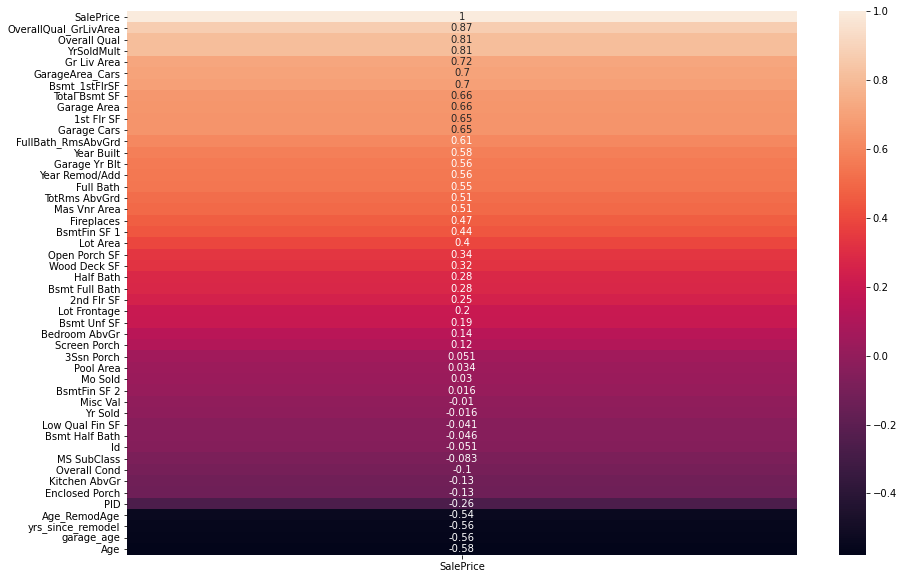

In [46]:
plt.subplots(figsize=(15,10))
sns.heatmap(ames_df_nona.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True);

**Correlation heatmap:** We see strong correlations between sales and overall quality and above-ground living area. There are also strong correlations with the garage area, garage number of cars, total basement square feet, and 1st floor square feet (all between 0.62 and 0.65). There are strong negative correlations with Years since remodel, Garage age, and Age - to be expected, since the value will go down the older the house is.

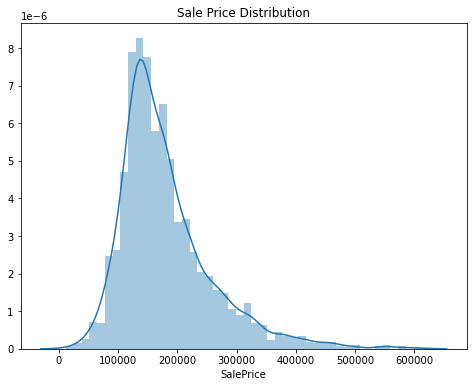

In [47]:
plt.subplots(figsize=(8,6))
sns.distplot(ames_df_nona['SalePrice'])
plt.title('Sale Price Distribution');

**Sale price distribution:** Most houses sold somewhere between \\$100,000 and \\$200,000, but there is a long tail that reaches just beyond \\$600,000. It may be worth experimenting with dropping rows for houses sold over \\$500,000 if we consider those to be outliers.

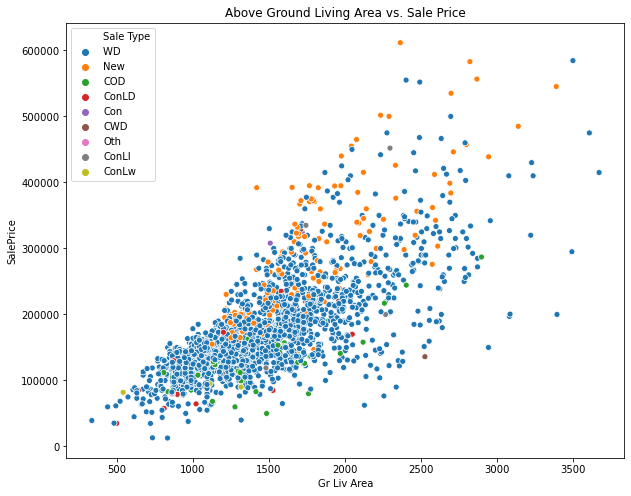

In [48]:
plt.subplots(figsize=(10,8))
sns.scatterplot('Gr Liv Area', 'SalePrice', data = ames_df_nona, hue = 'Sale Type')
plt.title('Above Ground Living Area vs. Sale Price');

**Gr Liv Area vs SalePrice, with Sale Type as hue:** It appears that new sales are generally higher, though there are 2 interesting outliers that sold for just under \\$200,000 while being larger than 5000 sq ft. These might be worth eliminating as outliers. Warranty Deed - conventional (blue dots) is clearly the most popular sale type.

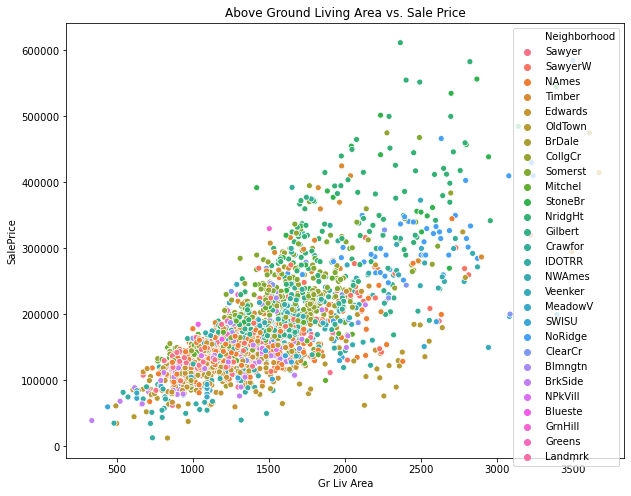

In [49]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('Gr Liv Area', 'SalePrice', data = ames_df_nona, hue = 'Neighborhood')
plt.title('Above Ground Living Area vs. Sale Price');

**Above Ground Living Area vs Sale Price by Neighborhood:** This is a bit messy due to the number of neighborhoods, but there are some color clusters. This may be more interesting once we dummify this variable.

In [50]:
mean_price = np.mean(ames_df_nona['SalePrice'])
mean_price

180622.81984205332

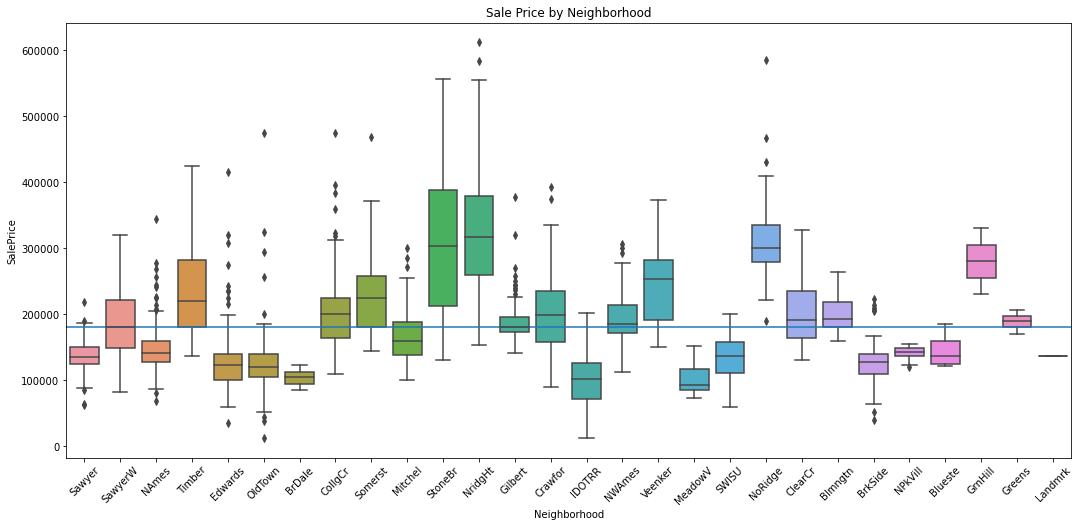

In [51]:
# Rotation from: https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
# Mean line from: https://stackoverflow.com/questions/52005576/seaborn-boxplot-horizontal-line-annotation
fig, ax = plt.subplots(figsize=(18, 8))
sns.boxplot('Neighborhood', 'SalePrice', data = ames_df_nona, ax=ax)
plt.title('Sale Price by Neighborhood');
plt.xticks(rotation=45);
ax.axhline(y=mean_price);

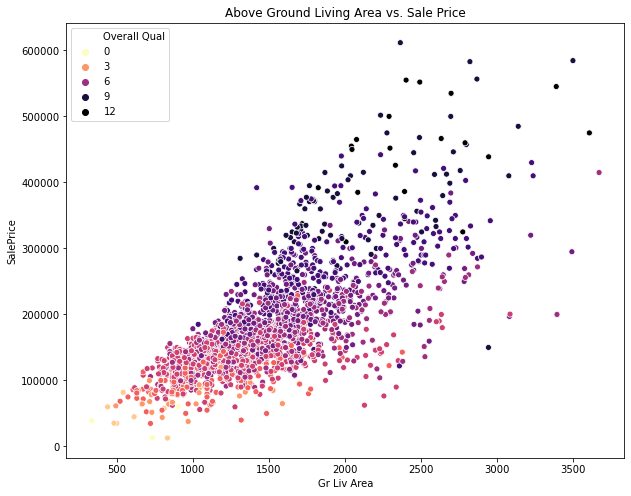

In [52]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('Gr Liv Area', 'SalePrice', data = ames_df_nona, hue = 'Overall Qual', palette='magma_r')
plt.title('Above Ground Living Area vs. Sale Price');

**Above Ground Living Area vs Sale Price by Overall Quality:** This shows a clear correlation between both above ground living area and overall quality, indicating that these 2 features will likely be important for a strong model. 

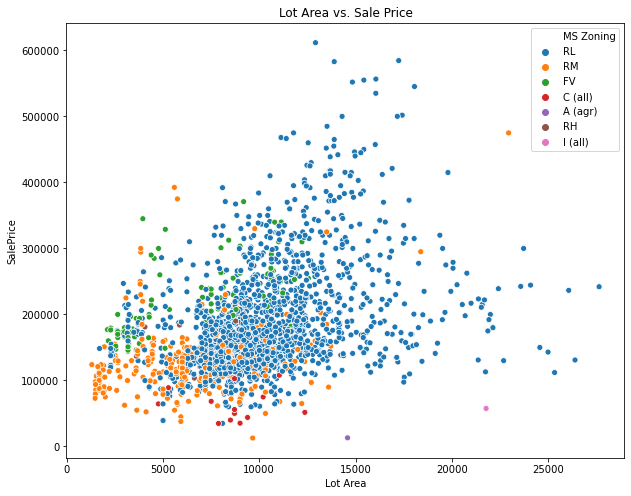

In [53]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('Lot Area', 'SalePrice', data = ames_df_nona, hue = 'MS Zoning')
plt.title('Lot Area vs. Sale Price');

**Lot Area vs Sale Price including Zoning:** There still appears to be a few outliers on this scatterplot, indicating that I might have a stronger model if I eliminate any properties with a lot size greater than 30,000 square feet.

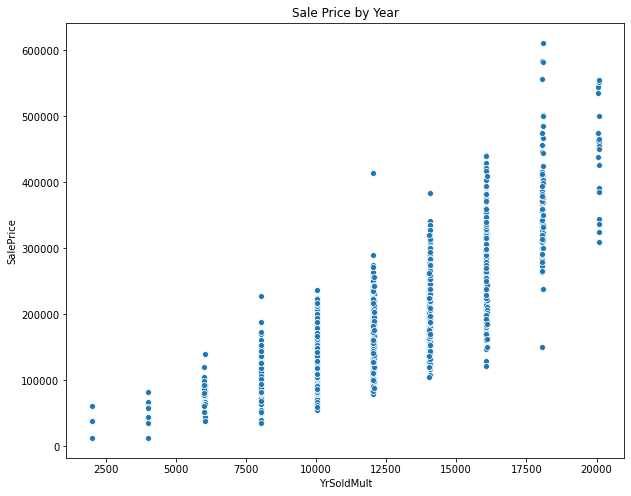

In [54]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('YrSoldMult', 'SalePrice', data = ames_df_nona)
plt.title('Sale Price by Year');

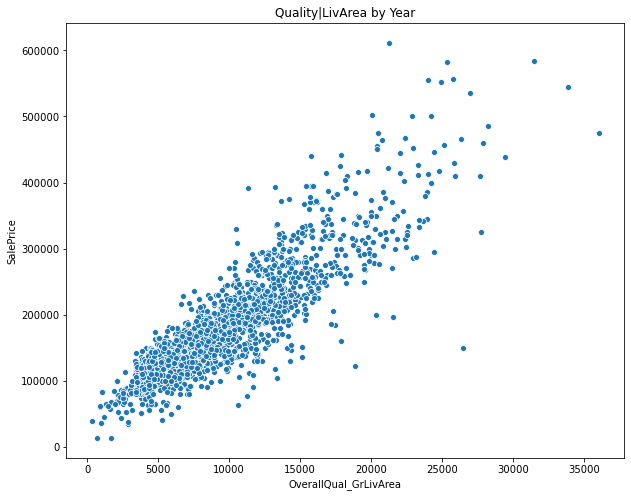

In [55]:
plt.subplots(figsize=(10, 8))
sns.scatterplot('OverallQual_GrLivArea', 'SalePrice', data = ames_df_nona)
plt.title('Quality|LivArea by Year');

NameError: name 'important_coefs' is not defined

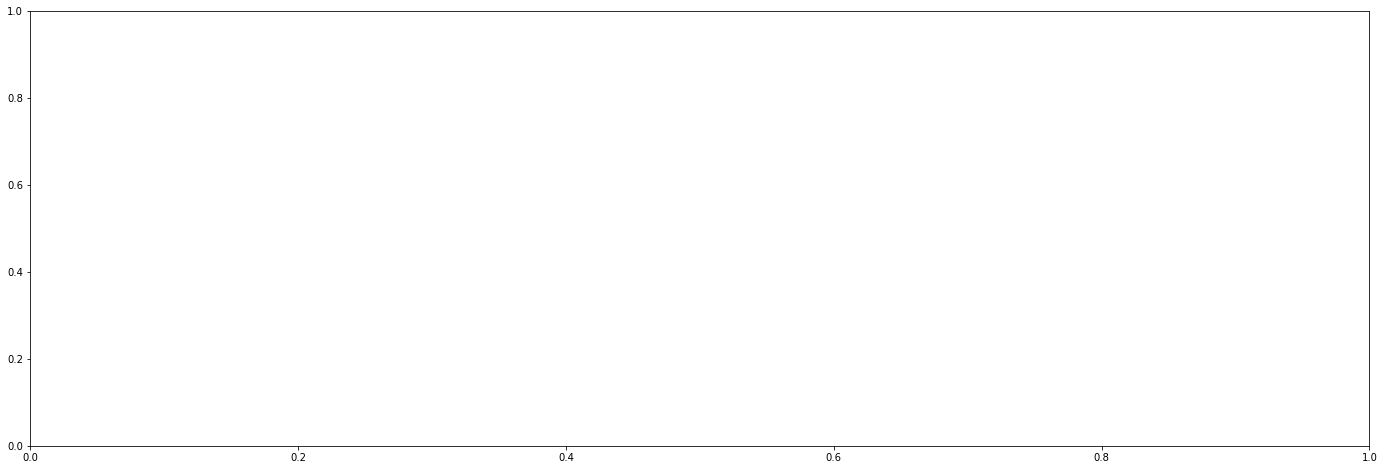

In [56]:
plt.subplots(figsize=(24, 8))
sns.barplot(x='Feature Names', y='Coefficients', data=(important_coefs.sort_values(by='Coefficients').nlargest(20, 'Coefficients'))),
plt.xticks(rotation=45);

## Initial Model Building

For this first set, I want to create a smaller subset of the data using hand-picked features that have high correlation and a lower chance of multicolinearity (ie, using "Garage Area" but not "Garage Cars", even though both have high correlations).

In [ ]:
ames_df_nona.select_dtypes(include='object').info()

In [ ]:
ames_df_smaller = ames_df_nona[[ 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Full Bath', 'Fireplaces', 'Lot Area', 'Age', 'SalePrice']]

In [ ]:
ames_df_smaller.head(2)

In [ ]:
ames_df_smaller = ames_df_smaller[ames_df_smaller['Lot Area'] < 30_000]

In [ ]:
ames_df_smaller

In [ ]:
ames_df_smaller = pd.get_dummies(ames_df_smaller, drop_first=True)

In [ ]:
ames_df_smaller.head(2)

In [ ]:

sns.heatmap(ames_df_smaller.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True);

In [ ]:
X = ames_df_smaller.drop(columns=['SalePrice'])
y = ames_df_smaller['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [56]:
X2 = ames_df_nona.drop(columns=['Id','PID','MS SubClass','Year Built', 'Year Remod/Add','Garage Yr Blt','Yr Sold', 'SalePrice'])
y2 = ames_df_nona['SalePrice']

In [57]:
X2

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,0.0,13517,6,8,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,3,35,6,35.0,8874,950.0,210,525625.0,12,12060
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,43.0,11492,7,5,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,4,15,14,14.0,14854,1118.0,210,833569.0,16,14063
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,68.0,7922,5,7,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,0,0,0,1,58,4,58.0,5285,246.0,232,1117249.0,5,10050
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,73.0,9802,5,5,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,0,0,0,4,5,4,4.0,7220,800.0,20,285696.0,14,10050
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,82.0,14235,6,8,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,0,0,0,3,111,18,54.0,8670,968.0,1998,561756.0,12,12060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,79.0,11449,8,5,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2.0,520.0,0,276,0,0,0,0,0,1,4,4,4.0,13824,1040.0,16,3255552.0,14,16064
2047,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,0.0,12342,4,5,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,2.0,539.0,158,0,0,0,0,0,0,3,71,61,50.0,3444,1078.0,4331,741321.0,4,8036
2048,RL,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,NA,NA,NA,WD,57.0,7558,6,6,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,2.0,342.0,0,0,0,0,0,0,0,3,83,61,82.0,11478,684.0,50

In [74]:
y2_log = np.log(ames_df_nona['SalePrice'])

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=22)

In [65]:
X2_train

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
930,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,72.0,10152,5,5,120.0,586.0,0.0,462.0,1048.0,1048,0,0,1048,1.0,0.0,1,0,3,1,6,0,1.0,286.0,0,20,0,0,192,0,0,6,55,55,55.0,5240,286.0,3025,1098304.0,6,10035
421,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,New,63.0,13072,6,5,0.0,941.0,0.0,217.0,1158.0,1158,0,0,1158,1.0,0.0,1,1,3,1,5,0,2.0,576.0,0,50,0,0,0,0,0,5,7,7,5.0,6948,1152.0,49,1340964.0,5,12036
516,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NA,GdPrv,NA,WD,80.0,9938,7,5,246.0,750.0,0.0,300.0,1050.0,1062,887,0,1949,1.0,0.0,2,1,3,1,8,1,2.0,574.0,156,90,0,0,0,0,0,6,18,17,18.0,13643,1148.0,306,1115100.0,16,14070
656,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,AsbShng,Stucco,None,TA,TA,BrkTil,TA,Fa,No,Unf,Unf,GasW,Fa,N,SBrkr,TA,Min2,NA,2Types,Unf,Fa,Fa,N,NA,NA,NA,WD,60.0,9600,4,2,0.0,0.0,0.0,1095.0,1095.0,1095,679,0,1774,1.0,0.0,2,0,4,2,8,0,3.0,779.0,0,0,90,0,0,0,0,5,111,61,91.0,7096,2337.0,6771,1199025.0,16,8024
1597,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,LwQ,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NA,MnPrv,NA,WD,0.0,9535,5,5,450.0,194.0,982.0,0.0,1176.0,1458,0,0,1458,1.0,0.0,1,1,3,1,7,1,2.0,512.0,284,0,0,0,0,0,0,7,44,44,44.0,7290,1024.0,1936,1714608.0,7,10030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Gd,Gd,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,91.0,10437,8,6,660.0,1696.0,0.0,413.0,2109.0,2113,0,0,2113,1.0,0.0,2,1,2,1,7,1,3.0,839.0,236,46,0,0,0,0,0,8,16,16,16.0,16904,2517.0,256,4456317.0,14,16064
973,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,LwQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,65.0,11050,5,5,0.0,488.0,0.0,517.0,1005.0,1005,0,0,1005,0.0,0.0,1,0,2,1,6,1,1.0,319.0,0,0,0,0,288,0,0,7,55,55,55.0,5025,319.0,3025,1010025.0,6,10030
821,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,CBlock,CBlock,None,Fa,TA,PConc,TA,TA,No,ALQ,Rec,GasA,Ex,Y,SBrkr,TA,Typ,NA,Detchd,Fin,TA,TA,Y,NA,NA,NA,WD,90.0,5400,4,6,0.0,315.0,105.0,420.0,840.0,840,534,0,1374,0.0,0.0,1,0,2,1,6,0,1

In [159]:
# pipe1 = make_pipeline(PolynomialFeatures(),
#                       StandardScaler(),
#                      SelectKBest(f_regression),
#                     KNeighborsRegressor())

# params1 = {
#     'polynomialfeatures': [2,3],
#     'selectkbest__k' : range(3, 20),
#     'kneighborsregressor__n_neighbors': [11, 13, 15, 17, 19, 21]
# }

# gs = GridSearchCV(pipe1, params1, n_jobs=-1)
# gs.fit(X_train, y_train)

# print('Train Best', gs.best_score_)
# print('Test Score', gs.score(X_test, y_test))
# gs.best_params_

In [54]:
pipe2 = make_pipeline(
                    PolynomialFeatures(),
                      StandardScaler(),
                     SelectKBest(f_regression),
                    LinearRegression())

params2 = {
    'selectkbest__k' : range(3, 60)
}

gs2 = GridSearchCV(pipe2, params2, n_jobs=-1)
gs2.fit(X_train, y_train)

print('Train Best', gs2.best_score_)
print('Test Score', gs2.score(X_test, y_test))
gs2.best_params_

Train Best 0.8799627168668304
Test Score 0.9012224389365743


/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


{'selectkbest__k': 40}

In [82]:
X2_real_test = ames_df_test_nona.drop(columns=['Id','PID','MS SubClass','Year Built', 'Year Remod/Add','Garage Yr Blt','Yr Sold'])

In [83]:
X2_real_test.shape

(878, 82)

In [84]:
X2_real_test.head(2)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,Fa,Typ,NA,Detchd,Unf,Po,Po,Y,NA,NA,NA,WD,69.0,9142,6,8,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1,440,0,60,112,0,0,0,0,4,101,61,101.0,11568,440,6161,926160,18,12036
1,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,0.0,9662,5,4,0.0,0,0,1967,1967,1967,0,0,1967,0,0,2,0,6,2,10,0,2,580,170,0,0,0,0,0,0,8,34,34,34.0,9835,1160,1156,3869089,20,10030


In [57]:
pipe2 = make_pipeline(
                      StandardScaler(),
                     SelectKBest(f_regression),
                    Ridge())

params2 = {
    'selectkbest__k' : range(3, 30),
    'ridge__alpha': [.01, .1, 1, 10, 100, 1000]
}

gs = GridSearchCV(pipe2, params2, n_jobs=-1)
gs.fit(X_train, y_train)

print('Train Best', gs.best_score_)
print('Test Score', gs.score(X_test, y_test))
gs.best_params_

Train Best 0.8277947814283388
Test Score 0.8580590582367068


{'ridge__alpha': 10, 'selectkbest__k': 8}

In [58]:
selected_feature = gs.best_estimator_.named_steps['selectkbest'].get_support()
X_cols = pd.DataFrame(X_train).columns.values[selected_feature==True]
coefs = gs.best_estimator_.named_steps['ridge'].coefs_
coef_df = pd.DataFrame(coefs, columns=X_cols).T
X_cols

AttributeError: 'Ridge' object has no attribute 'coefs_'

In [59]:
# Best one so far, before moving age columns
# template from https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
numeric_features = slice(1,31)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = slice(31, 73)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('classifier', LinearRegression())])

param_grid = {
    'selectkbest__k' : range(50, 150),
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2_train, y_train)

print('Train Best', grid.best_score_)
print('Test Score', grid.score(X2_test, y_test))
grid.best_params_

ValueError: could not convert string to float: 'Pave'

In [ ]:
y_preds = grid.predict(X_real_test)

In [ ]:
selected_feature = grid.best_estimator_.named_steps['selectkbest'].get_support()
X_cols = pd.get_dummies(X2_train).columns.values[selected_feature==True]
# coefs = grid.best_estimator_.named_steps['linearregression'].coefs_
# coef_df = pd.DataFrame(coefs, columns=X_cols).T
X_cols

In [ ]:
y_preds.mean()

In [ ]:
ames_df_test_nona['SalePrice'] = y_preds

In [ ]:
# Best one so far!
third_attempt = ames_df_test_nona[['Id', 'SalePrice']]

In [ ]:
third_attempt.to_csv('./uploads/third_attempt.csv', index=False)

In [60]:

numeric_features = slice(42,76)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = slice(0,42)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('classifier', LinearRegression())])

param_grid = {
    'selectkbest__k' : range(50, 150),
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2_train, y_train)

print('Train Best', grid.best_score_)
print('Test Score', grid.score(X2_test, y_test))
grid.best_params_

Train Best 0.910295519325682
Test Score 0.9304531866465734


{'selectkbest__k': 129}

In [66]:
y_preds2 = grid.predict(X2_real_test)

In [67]:
y_preds2.mean()

180468.48733510147

In [68]:
ames_df_test_nona['SalePrice'] = y_preds2

In [69]:
fourth_attempt = ames_df_test_nona[['Id', 'SalePrice']]

In [70]:
fourth_attempt.to_csv('./uploads/fourth_attempt.csv', index=False)

In [58]:
numeric_features = slice(42,76)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('powertransformer', PowerTransformer())])

categorical_features = slice(0,42)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('kneighborsregressor', KNeighborsRegressor())])

param_grid = {
    'selectkbest__k' : range(25, 75, 2),
    'kneighborsregressor__n_neighbors': [3, 5, 7, 11, 15],
    'kneighborsregressor__metric': ['minkowski','manhattan','euclidean']
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2_train, y_train)

print('Train Best', grid.best_score_)
print('Test Score', grid.score(X2_test, y_test))
grid.best_params_

Train Best 0.8666114725828932
Test Score 0.8868825355237236


{'kneighborsregressor__metric': 'minkowski',
 'kneighborsregressor__n_neighbors': 7,
 'selectkbest__k': 41}

In [69]:
numeric_features = slice(42,81)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = slice(0,42)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('powertransformer', PowerTransformer()),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('elasticnet', ElasticNet())])

param_grid = {
    'selectkbest__k' : range(50, 150, 2),
    'elasticnet__alpha': [.001, .01, .1, 1, 10, 100]
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2_train, y2_train)

print('Train Best', grid.best_score_)
print('Test Score', grid.score(X2_test, y2_test))
grid.best_params_

/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Train Best 0.8954142102169073
Test Score 0.9173521396998634


/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407030036151.3364, tolerance: 938662754.6178348
  model = cd_fast.enet_coordinate_descent(


{'elasticnet__alpha': 0.001, 'selectkbest__k': 118}

In [70]:

numeric_features = slice(42,81)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = slice(0,42)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('classifier', LinearRegression())])

param_grid = {
    'selectkbest__k' : range(50, 150),
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2_train, y2_train)

print('Train Best', grid.best_score_)
print('Test Score', grid.score(X2_test, y2_test))
grid.best_params_

Train Best 0.9191728124602531
Test Score 0.93828241340738


{'selectkbest__k': 134}

In [76]:
y_preds3 = grid.predict(X2_real_test)

In [77]:
y_preds3.mean()

180426.76356524962

In [79]:
ames_df_test_nona['SalePrice'] = y_preds3

In [80]:
fifth_attempt = ames_df_test_nona[['Id', 'SalePrice']]

In [82]:
fifth_attempt.to_csv('./uploads/fifth_attempt.csv', index=False)

In [66]:
# New best
numeric_features = slice(42,81)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = slice(0,42)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('classifier', Lasso())])

param_grid = {
    'selectkbest__k' : range(140,200),
    'classifier__alpha' : [50, 75, 100, 125]
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2, y2)

print('Train Best', grid.best_score_)
# print('Test Score', grid.score(X2_test, y2_test))
grid.best_params_

Train Best 0.9285805109031072


{'classifier__alpha': 100, 'selectkbest__k': 194}

In [97]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  slice(42, 81, None)),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  slice(0, 42, None))])),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fe68c673af0>)),
                ('classifier', Lasso())])

In [67]:
trial_run = pd.get_dummies(X2).drop(columns = ['YrSoldMult'])
trial_run.head(2)

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_NA,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_NA,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_NA,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_NA,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_NA,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Functional_

In [123]:
coefs = grid.best_estimator_.named_steps['classifier'].coef_
feature_names = grid.best_estimator_.named_steps['selectkbest'].get_support()
X_cols = grid.best_estimator_.named_steps['polynomialfeatures'].get_feature_names(X.columns)
#X_columns = X_cols[feature_names==True] 
feature_names_array = np.array(X_cols)[feature_names==True]
coefs_df = pd.DataFrame({'Feature Names': feature_names_array,'Coefficients': coefs})

AttributeError: 'Lasso' object has no attribute 'coefs_'

In [ ]:
features = gs.best_estimator_.named_steps['selectkbest'].get_support() 
coefs = gs.best_estimator_.named_steps['lasso'].coef_
x_cols = X.columns.values[features==True] 
pd.DataFrame(list(zip(x_cols, coefs)))

In [68]:
selected_feature = grid.best_estimator_.named_steps['selectkbest'].get_support()
coefs = grid.best_estimator_.named_steps['classifier'].coef_
X_cols = trial_run.columns.values[selected_feature==True]
coefs_df = pd.DataFrame({'Feature Names': X_cols,'Coefficients': coefs})
coefs_df

,Feature Names,Coefficients
0,Lot Frontage,944.486605
1,Lot Area,4963.282811
2,Overall Qual,-3443.334431
3,Overall Cond,6010.878571
4,Mas Vnr Area,2196.989649
...,...,...
189,Fence_NA,0.000000
190,Sale Type_COD,-4791.765228
191,Sale Type_ConLD,0.000000
192,Sale Type_New,12164.201468


In [69]:
# pd.options.display.max_rows = 200
important_coefs = coefs_df[(coefs_df['Coefficients'] > 1) | (coefs_df['Coefficients'] < -1)]
important_coefs.head(2)

,Feature Names,Coefficients
0,Lot Frontage,944.486605
1,Lot Area,4963.282811


In [79]:
important_coefs.sort_values(by='Coefficients')

,Feature Names,Coefficients
24,Age,-10791.771602
190,Sale Type_COD,-4791.765228
117,Bsmt Qual_Gd,-4311.476452
2,Overall Qual,-3443.334431
167,Garage Type_Basment,-3238.569934
...,...,...
160,Functional_Typ,13093.592500
103,Exter Qual_Ex,15803.006865
151,Kitchen Qual_Ex,17968.253906
62,Neighborhood_StoneBr,20163.523560


In [70]:
my_features = list(important_coefs['Feature Names'])
X5 = trial_run[my_features]

In [72]:
X_real_test2 = pd.get_dummies(ames_df_test_nona).drop(columns = ['YrSoldMult'])

In [73]:
X_real_test2 = X_real_test2[my_features]
X_real_test2.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,Gr Liv Area,Bsmt Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Fireplaces,Garage Cars,Wood Deck SF,Open Porch SF,Enclosed Porch,Screen Porch,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,MS Zoning_FV,MS Zoning_RL,MS Zoning_RM,Land Contour_HLS,Lot Config_CulDSac,Lot Config_Inside,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Condition 1_Artery,Condition 1_Norm,Bldg Type_1Fam,Bldg Type_Twnhs,House Style_1.5Fin,Exterior 1st_HdBoard,Exterior 1st_Wd Sdng,Exterior 2nd_Plywood,Exterior 2nd_Wd Sdng,Mas Vnr Type_BrkFace,Mas Vnr Type_Stone,Exter Qual_Ex,Exter Qual_TA,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Bsmt Qual_Ex,Bsmt Qual_Gd,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_No,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,Heating QC_Ex,Heating QC_TA,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Functional_Min2,Functional_Typ,Fireplace Qu_Gd,Garage Type_Attchd,Garage Type_Basment,Garage Type_Detchd,Garage Finish_Fin,Paved Drive_Y,Sale Type_COD,Sale Type_New
0,69.0,9142,6,8,0.0,0,1020,1020,908,1928,0,0,4,2,0,1,0,60,112,0,101,61,101.0,11568,440,926160,18,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,0.0,9662,5,4,0.0,0,1967,1967,1967,1967,0,0,6,2,0,2,170,0,0,0,34,34,34.0,9835,1160,3869089,20,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0
2,58.0,17104,7,5,0.0,554,100,654,664,1496,1,1,3,1,1,2,100,24,0,0,5,5,5.0,10472,852,434256,14,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,1
3,60.0,8520,5,6,0.0,0,968,968,968,968,0,0,2,1,0,2,0,0,184,0,88,5,76.0,4840,960,937024,5,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4,0.0,9500,6,5,247.0,609,785,1394,1394,1394,1,1,3,1,2,2,0,76,0,185,48,48,48.0,8364,1028,1943236,6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0


In [107]:
y_preds = grid.predict(X2_real_test)

In [108]:
y_preds.mean()

179930.2089816913

In [109]:
ames_df_test_nona['SalePrice'] = y_preds

In [110]:
seventh_attempt = ames_df_test_nona[['Id', 'SalePrice']]

In [112]:
seventh_attempt.to_csv('./uploads/seventh_attempt.csv', index=False)

In [71]:
# numeric_features = slice(42,82)
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# categorical_features = slice(0,42)
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('scaler', StandardScaler()),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('classifier', Lasso())])

param_grid = {
    'selectkbest__k' : range(50, 150),
    'classifier__alpha' : [.01, .1, 1, 10, 100]
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X5, y2)

print('Train Best', grid.best_score_)
# print('Test Score', grid.score(X5, y))
grid.best_params_

Train Best 0.931229740415295


{'classifier__alpha': 100, 'selectkbest__k': 77}

In [74]:
y_preds = grid.predict(X_real_test2)

In [75]:
y_preds.mean()

179889.77132621722

In [76]:
ames_df_test_nona['SalePrice'] = y_preds

In [77]:
eighth_attempt = ames_df_test_nona[['Id', 'SalePrice']]

In [78]:
eighth_attempt.to_csv('./uploads/eighth_attempt.csv', index=False)

In [157]:
X2.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,0.0,13517,6,8,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,3,35,6,35.0,8874,950.0,210,525625.0,12,12060
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,43.0,11492,7,5,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,4,15,14,14.0,14854,1118.0,210,833569.0,16,14063
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,68.0,7922,5,7,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,0,0,0,1,58,4,58.0,5285,246.0,232,1117249.0,5,10050
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,73.0,9802,5,5,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,0,0,0,4,5,4,4.0,7220,800.0,20,285696.0,14,10050
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,82.0,14235,6,8,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,0,0,0,3,111,18,54.0,8670,968.0,1998,561756.0,12,12060


In [152]:
y.head()

0    11.779129
1    12.301383
2    11.599103
3    12.066811
4    11.838626
Name: SalePrice, dtype: float64

In [65]:
numeric_features = slice(42,81)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = slice(0,42)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selectkbest', SelectKBest(f_regression)),
                      ('classifier', Lasso())])

param_grid = {
    'selectkbest__k' : range(140,200),
    'classifier__alpha' : [50, 75, 100, 125]
}

grid = GridSearchCV(clf, param_grid, n_jobs=-1)
grid.fit(X2, y2)

print('Train Best', grid.best_score_)
# print('Test Score', grid.score(X2_test, y2_test))
grid.best_params_

Train Best 0.9268514972711692


{'classifier__alpha': 125, 'selectkbest__k': 174}

In [58]:
y2_log = np.log(y2)

In [59]:
y2_log.sort_values()

1628     9.456341
183      9.480368
1309    10.460242
1292    10.463103
1518    10.471950
          ...    
1164    13.226723
151     13.229568
1796    13.275828
1692    13.278512
1671    13.323927
Name: SalePrice, Length: 2026, dtype: float64

In [68]:
len(X2)

2026

In [76]:
X2_train, X2_test, y2_log_train, y2_log_test = train_test_split(X2, y2_log)

In [98]:
X2

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,0.0,13517,6,8,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,3,35,6,35.0,8874,950.0,210,525625.0,12,12060
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,43.0,11492,7,5,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,4,15,14,14.0,14854,1118.0,210,833569.0,16,14063
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,68.0,7922,5,7,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,0,52,0,0,0,0,0,1,58,4,58.0,5285,246.0,232,1117249.0,5,10050
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,73.0,9802,5,5,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,100,0,0,0,0,0,0,4,5,4,4.0,7220,800.0,20,285696.0,14,10050
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,N,NA,NA,NA,WD,82.0,14235,6,8,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,59,0,0,0,0,0,3,111,18,54.0,8670,968.0,1998,561756.0,12,12060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,79.0,11449,8,5,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2.0,520.0,0,276,0,0,0,0,0,1,4,4,4.0,13824,1040.0,16,3255552.0,14,16064
2047,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,0.0,12342,4,5,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,2.0,539.0,158,0,0,0,0,0,0,3,71,61,50.0,3444,1078.0,4331,741321.0,4,8036
2048,RL,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,NA,NA,NA,WD,57.0,7558,6,6,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,2.0,342.0,0,0,0,0,0,0,0,3,83,61,82.0,11478,684.0,50

In [97]:
y2_log

0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
2046    12.607366
2047    11.320554
2048    12.083905
2049    11.877569
2050    12.149502
Name: SalePrice, Length: 2026, dtype: float64

In [80]:
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_include='object')

preprocessor2 = make_column_transformer(
    (make_pipeline(StandardScaler()), num_cols),
    (make_pipeline(OneHotEncoder(handle_unknown='ignore')), cat_cols)
)


param_grid = {
    'selectkbest__k': range(140,200),
    'lasso__alpha' : [50, 75, 100, 125],
}

pipe = make_pipeline(preprocessor2,SelectKBest(),Lasso())

grid2 = GridSearchCV(pipe,param_grid,n_jobs=-1)
grid2.fit(X2, y2_log)

print('Train Best', grid.best_score_)
print('Train Score', grid.score(X2_train, y2_log_train))
print('Test Score', grid.score(X2_test, y2_log_test))
grid2.best_params_

Train Best 0.9268514972711692
Train Score -232664930519.76703
Test Score -218428878813.7025


/Users/claireph/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


{'lasso__alpha': 50, 'selectkbest__k': 140}

In [100]:
X2_real_test

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Age,yrs_since_remodel,garage_age,OverallQual_GrLivArea,GarageArea_Cars,Age_RemodAge,Bsmt_1stFlrSF,FullBath_RmsAbvGrd,YrSoldMult
0,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,Stone,Fa,TA,No,Unf,Unf,GasA,Gd,N,FuseP,Fa,Typ,NA,Detchd,Unf,Po,Po,Y,NA,NA,NA,WD,69.0,9142,6,8,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1,440,0,60,112,0,0,0,0,4,101,61,101.0,11568,440,6161,926160,18,12036
1,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,0.0,9662,5,4,0.0,0,0,1967,1967,1967,0,0,1967,0,0,2,0,6,2,10,0,2,580,170,0,0,0,0,0,0,8,34,34,34.0,9835,1160,1156,3869089,20,10030
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,NA,NA,New,58.0,17104,7,5,0.0,554,0,100,654,664,832,0,1496,1,0,2,1,3,1,7,1,2,426,100,24,0,0,0,0,0,9,5,5,5.0,10472,852,25,434256,14,14042
3,RM,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NA,Detchd,Unf,Fa,TA,N,NA,NA,NA,WD,60.0,8520,5,6,0.0,0,0,968,968,968,0,0,968,0,0,1,0,2,1,5,0,2,480,0,0,184,0,0,0,0,7,88,5,76.0,4840,960,440,937024,5,10035
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,0.0,9500,6,5,247.0,609,0,785,1394,1394,0,0,1394,1,0,1,1,3,1,6,2,2,514,0,76,0,0,185,0,0,7,48,48,48.0,8364,1028,2304,1943236,6,12054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,80.0,8000,6,6,0.0,931,153,0,1084,1084,793,0,1877,1,0,2,1,4,1,8,1,2,488,0,96,0,0,0,0,0,11,37,37,37.0,11262,976,1369,1175056,16,12042
874,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,CBlock,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,MnPrv,NA,WD,90.0,14670,6,7,410.0,575,0,529,1104,1104,884,0,1988,0,0,2,1,4,1,9,1,2,480,0,230,0,0,0,0,0,8,45,12,45.0,11928,960,540,1218816,18,12048
875,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,BLQ,LwQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,55.0,8250,5,5,0.0,250,492,210,952,1211,0,0,1211,0,0,1,0,3,1,5,1,1,322,0,63,0,0,0,0,0,8,43,43,43.0,6055,322,1849,1152872,5,10040
876,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,PCon

In [99]:
grid2.predict(X2_real_test)

array([12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02

In [96]:
y_preds

array([12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02063365,
       12.02063365, 12.02063365, 12.02063365, 12.02063365, 12.02

In [89]:
y_preds = np.e**y_preds

In [90]:
y_preds.mean()

166147.90312527266

In [91]:
ames_df_test_nona['SalePrice'] = y_preds

In [92]:
ninth_attempt = ames_df_test_nona[['Id', 'SalePrice']]

In [93]:
ninth_attempt.to_csv('./uploads/ninth_attempt.csv', index=False)

In [63]:
grid2.best_score_

-0.0022292012652691097

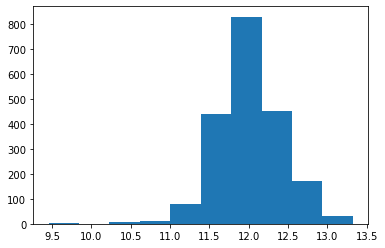

In [140]:
plt.hist(np.log(ames_df_nona['SalePrice']));

In [69]:
lr = LinearRegression()

In [70]:
X = ames_df_nona[['Overall Qual']]
y = np.log(ames_df_nona['SalePrice'])

In [71]:
lr.fit(X, y)

LinearRegression()

In [72]:
y.head

<bound method NDFrame.head of 0       11.779129
1       12.301383
2       11.599103
3       12.066811
4       11.838626
          ...    
2046    12.607366
2047    11.320554
2048    12.083905
2049    11.877569
2050    12.149502
Name: SalePrice, Length: 2026, dtype: float64>

In [73]:
lr.score(X,y)

0.6889571715727558

In [142]:
preds = lr.predict(X)

In [143]:
np.e**preds[:5]

array([161779.37157661, 205645.90162461, 127270.05430674, 127270.05430674,
       161779.37157661])

In [146]:
ames_df_nona['SalePrice'][:5]

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64